In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os


 ### For each flower type, we'll use ImageDataGenerator to load images and augment the dataset

In [2]:
# Define the directory path to your dataset
data_dir = "flower_photos"  # Replace with the actual path of your flower_photos folder

# Set up ImageDataGenerator for training and validation with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)

# Load train and validation data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


### Build the CNN Model
* This CNN architecture includes several convolutional and pooling layers, followed by dense layers to classify the images into five categories

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 categories (daisy, dandelion, roses, sunflowers, tulips)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Use early stopping to prevent overfitting and reduce learning rate on plateau
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)

# # Re-define the model architecture with dropout
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(2, 2),
    
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
    
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
    
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
    
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.2),  # Increased dropout rate
#     Dense(5, activation='softmax')
# ])

# # Compile the model with a lower learning rate
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


### Train the Model
* We will now train the model on the flower dataset with the training and validation sets.

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # You can adjust the epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 451ms/step - accuracy: 0.6500 - loss: 0.8843 - val_accuracy: 0.6491 - val_loss: 0.8762
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.6688 - val_accuracy: 0.6667 - val_loss: 0.8250
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 446ms/step - accuracy: 0.6913 - loss: 0.8196 - val_accuracy: 0.6136 - val_loss: 0.9165
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.6416 - val_accuracy: 0.5926 - val_loss: 0.9019
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 447ms/step - accuracy: 0.6816 - loss: 0.8197 - val_accuracy: 0.6222 - val_loss: 0.9416
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.6641 - val_accuracy: 0.6667 - val_loss: 1.0205
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 445ms/step - accuracy: 0.6914 - loss: 0.7973 - val_accuracy: 0.6562 - val_loss: 0.9140
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 1.1038 - val_accuracy: 0.7037

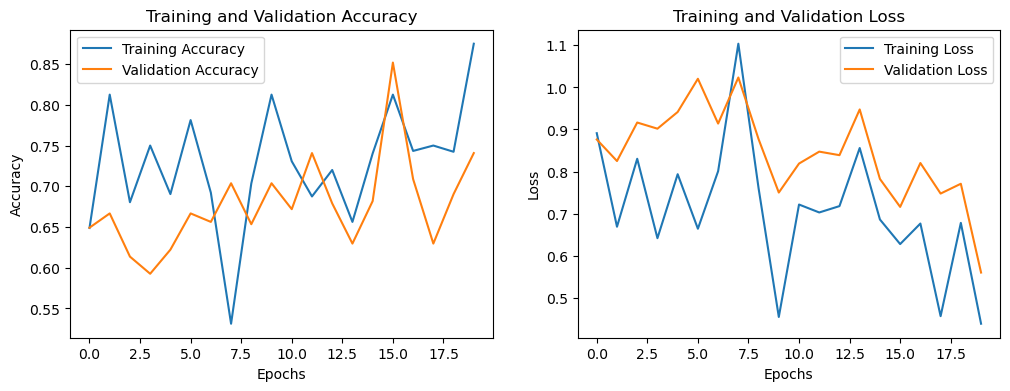

In [14]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [15]:
model.save('flower_classification_model.h5')


### Make Predictions on New Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


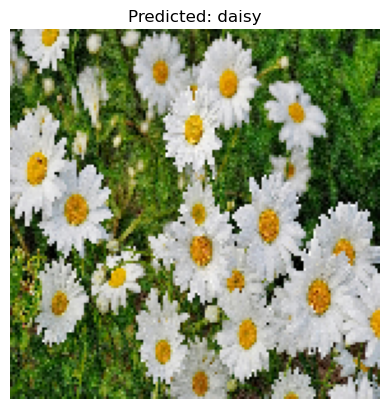

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the class names (same order as your training data generator's classes)
class_names = list(train_generator.class_indices.keys())

def predict_and_show_image(img_path):
    # Load the image with the target size expected by the model
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch
    
    # Preprocess the image array if required (e.g., rescale 1/255. if done in ImageDataGenerator)
    img_array /= 255.0
    
    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_names[predicted_class]
    
    # Display the image with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example usage with the path to a new image
predict_and_show_image('Daisy_flower.jpg')
